
Exercises XP

Last Updated: June 10th, 2025

XP Exercises: Flower Classification using CNN


👩‍🏫 👩🏿‍🏫 What You’ll learn

    Building a CNN for multi-class image classification.
    Data loading and preprocessing using image_dataset_from_directory.
    Image visualization techniques.
    Model architecture design, compilation, and training.
    Evaluating model performance using accuracy and loss plots.


🛠️ What you will create

A CNN model capable of classifying images of 14 different flower species with high accuracy.

All “Part 1,” “Part 2,” etc., sections comprise one comprehensive exercise and are meant to be tackled sequentially as a single, continuous task.


Dataset : Flower Classification Dataset Description

This dataset is designed for multi-class image classification of 14 different flower species. The goal is to train a model that can accurately categorize flower images into their respective species.


Dataset Overview

    Number of Classes: 14
    Flower Species:
        Astilbe
        Bellflower
        Black-eyed Susan
        Calendula
        California Poppy
        Carnation
        Common Daisy
        Coreopsis
        Dandelion
        Iris
        Rose
        Sunflower
        Tulip
        Water Lily
    Data Organization: Images are organized into a directory structure, with likely separate folders for each species. Training and validation splits are provided.
    Image Format: Likely JPEG or PNG. The provided code initially assumes RGB (3-channel) images.
    Image Size: Images are resized to 256x256 pixels in the provided code. Original sizes may vary.
    Dataset Size:
        Training Set: 13,642 images
        Validation Set: 98 images


Part 1: Data Exploration and Visualization

1. Objective: Familiarize yourself with the dataset.
2. Task:

    Load the dataset using image_dataset_from_directory.
    Print the number of images per class.
    Modify the visualize_images function to display a grid of 3x3 images for each flower class. Ensure the class name is displayed as the title for each grid.
    Analyze the images. What are some challenges you anticipate in classifying these flowers? (e.g., similar colors, shapes, variations within a species).


Part 2: Model Architecture Design

1. Objective: Design a CNN architecture suitable for this task.
2. Task:

    Start with the provided model architecture.
    Experiment with the number of convolutional layers, filters, kernel sizes, and max-pooling layers.
    Try different combinations of dense layers and dropout rates.
    Consider adding Batch Normalization layers after convolutional or dense layers.
    Justify your architectural choices. Why did you choose these specific layers and parameters?


Part 3: Hyperparameter Tuning

1. Objective: Optimize the model’s performance by tuning hyperparameters.
2. Task:

    Experiment with different optimizers (e.g., Adam, RMSprop, SGD).
    Vary the learning rate and batch size.
    Try different loss functions (if applicable).
    Use techniques like learning rate scheduling or early stopping to improve training.
    Keep track of your experiments and their results. Which combination of hyperparameters yielded the best performance?


Part 4: Data Augmentation

1. Objective: Improve model generalization by applying data augmentation.
2. Task:

    Implement data augmentation using ImageDataGenerator.
    Explore different augmentation techniques:
        Rotation
        Flipping (horizontal/vertical)
        Zooming
        Shifting (width/height)
        Shearing
    Determine which augmentations are most effective for this dataset and explain why.


Part 5: Performance Evaluation and Analysis

1. Objective: Thoroughly evaluate the model’s performance.
2. Task:

    Plot the training and validation accuracy and loss curves. Analyze these plots for signs of overfitting or underfitting.
    Calculate other relevant metrics like precision, recall, F1-score, and confusion matrix. How does the model perform on each flower class? Are there any classes that are particularly difficult to classify?
    Visualize the model’s predictions on a set of test images. Identify any misclassifications and try to understand why they occurred.


Part 6: Model Saving and Deployment (Optional)

1. Objective: Save the trained model for future use and explore deployment possibilities.
2. Task:

    Save the trained model in a suitable format (e.g., .h5, SavedModel).
    (Optional) Explore ways to deploy the model for real-time predictions:
        Using a web framework like Flask or Django.
        Deploying to a cloud platform (e.g., Google Cloud, AWS).
        Creating a simple mobile app.


In [1]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical,image_dataset_from_directory
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
train_ds = image_dataset_from_directory(
    "Data/train", image_size=(256, 256), batch_size=32)
val_ds = image_dataset_from_directory(
    "Data/val", image_size=(256, 256), batch_size=32)

class_names = train_ds.class_names
print("Classes :", class_names)

Found 13642 files belonging to 14 classes.
Found 98 files belonging to 14 classes.
Classes : ['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip', 'water_lily']


Compter le nombre d’images par classe avec boucle for

Fonction visualize_images(train_ds, class_names)

    Affiche grille 3×3 par classe

    Titre = nom de l’espèce

similitudes de forme, variations de couleur, problèmes de luminosité, espèce rare…

In [4]:
def build_model():
    model = models.Sequential([
        layers.Input(shape=(256, 256, 3)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(14, activation='softmax')
    ])
    return model

In [5]:
def plot_history(h, title=""):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(h.history["accuracy"], label="Train acc")
    plt.plot(h.history["val_accuracy"], label="Val acc")
    plt.title(f"{title} - Accuracy")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(h.history["loss"], label="Train loss")
    plt.plot(h.history["val_loss"], label="Val loss")
    plt.title(f"{title} - Loss")
    plt.legend()
    plt.show()

Bloc conv/pool x3 pour extraire des patterns visuels progressifs

Flatten quand la représentation spatiale devient raisonnablement petite

Dense + Dropout pour classifier en 14 classes

Adam, lr=0.0005, batch 32

In [6]:
model = build_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)
]

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=callbacks)

plot_history(history, "Adam LR=0.0005")

Epoch 1/20
 58/427 ━━━━━━━━━━━━━━━━━━━━ 1:38 266ms/step - accuracy: 0.0727 - loss: 106.1948

KeyboardInterrupt: 

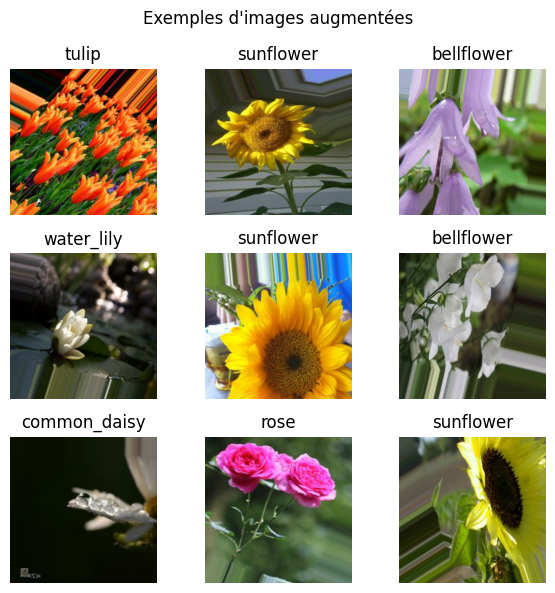

In [ ]:
# générateur avec transformations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1./255 
)

#charger un batch du train_ds (TensorFlow) pour visualiser


sample_batch = next(iter(train_ds))
images, labels = sample_batch[0], sample_batch[1]

aug_iter = datagen.flow(images, labels, batch_size=9)
aug_images, aug_labels = next(aug_iter)

# Affichage de 9 images augmentées
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(aug_images[i])
    plt.title(class_names[int(aug_labels[i])])
    plt.axis('off')
plt.suptitle("Exemples d'images augmentées")
plt.tight_layout()
plt.show()

rotation_range=40° : fait pivoter l’image jusqu’à ±40°

width/height shift : décale l’image de ±20 %

zoom_range : zoom avant/arrière jusqu’à 20 %

shear_range : tasse l’image (effet “coupé en biais”)

horizontal_flip : retourne à 50 %

fill_mode='nearest' : remplit les zones vides par interpolation

rescale : normalise si besoin

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


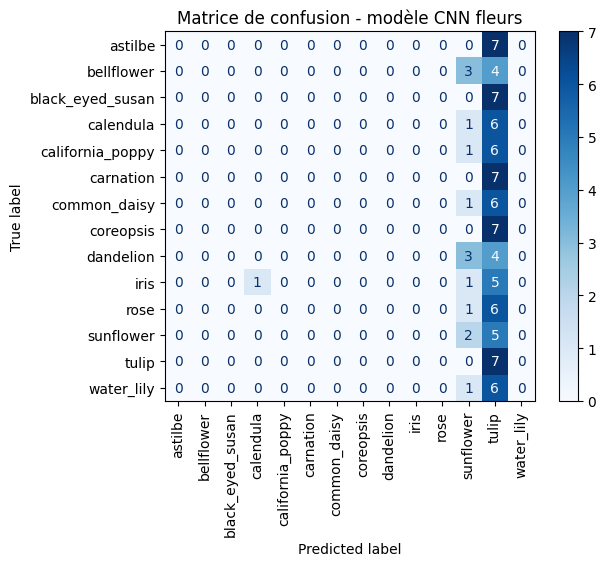

                  precision    recall  f1-score   support

         astilbe       0.00      0.00      0.00         7
      bellflower       0.00      0.00      0.00         7
black_eyed_susan       0.00      0.00      0.00         7
       calendula       0.00      0.00      0.00         7
california_poppy       0.00      0.00      0.00         7
       carnation       0.00      0.00      0.00         7
    common_daisy       0.00      0.00      0.00         7
       coreopsis       0.00      0.00      0.00         7
       dandelion       0.00      0.00      0.00         7
            iris       0.00      0.00      0.00         7
            rose       0.00      0.00      0.00         7
       sunflower       0.14      0.29      0.19         7
           tulip       0.08      1.00      0.16         7
      water_lily       0.00      0.00      0.00         7

        accuracy                           0.09        98
       macro avg       0.02      0.09      0.02        98
    weighted

In [11]:
# Prédictions sur validation/test
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Véritables labels
y_true = np.concatenate([y.numpy() for _, y in val_ds])

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de confusion - modèle CNN fleurs")
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

# Rapport par classe
print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))

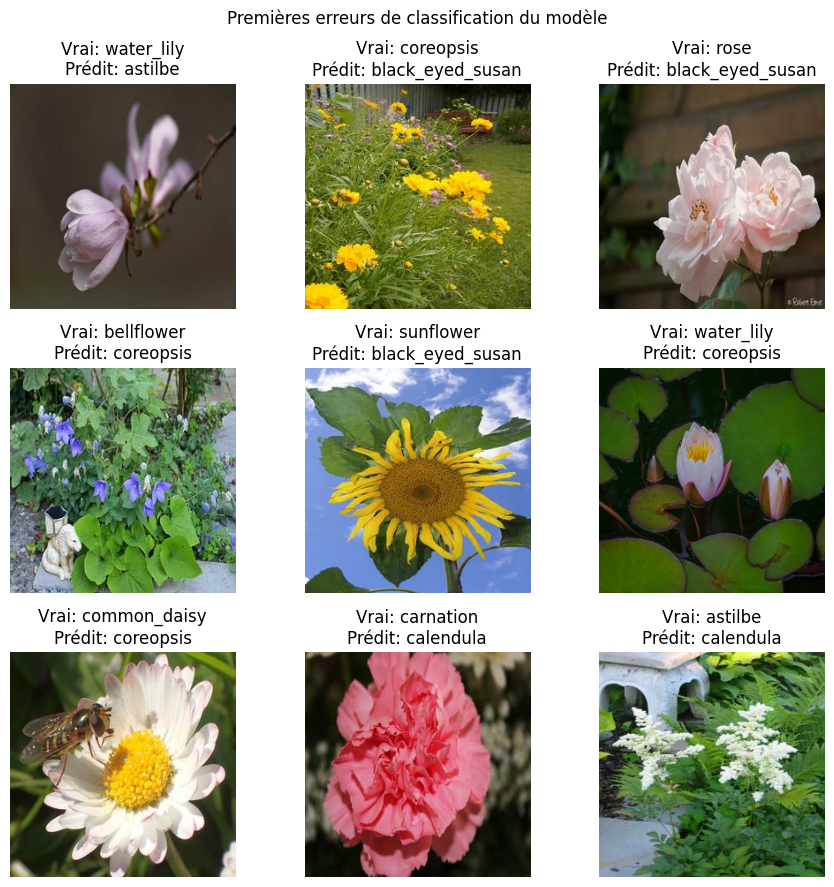

In [ ]:
imgs = []
trues = []
preds = []

for batch in val_ds.take(5):
    x_batch, y_batch = batch
    y_pred_batch = np.argmax(model.predict(x_batch, verbose=0), axis=1)
    for x_img, y_true, y_pred in zip(x_batch, y_batch, y_pred_batch):
        if y_true != y_pred:
            imgs.append(x_img)
            trues.append(int(y_true))
            preds.append(int(y_pred))
    if len(imgs) >= 9:
        break

# Affichage des 9 premières erreurs en grille 3x3
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(imgs[i].numpy().astype("uint8"))
    plt.title(f"Vrai: {class_names[trues[i]]}\nPrédit: {class_names[preds[i]]}")
    plt.axis('off')
plt.suptitle("Premières erreurs de classification du modèle")
plt.tight_layout()
plt.show()

le modèle a tendance à prédire toujours les mêmes classes, même quand c’est faux. Donc il n’a pas appris à différencier les fleurs.

Quand on regarde le rapport, on voit des f1-score à 0 pour la majorité des classes.
C’est normal si le modèle ne prédit jamais ces classes

Plus d’epochs (5 c’est trop peu)

class_weight pour forcer l’équilibre

Dropout, BatchNormalization, augmentation

In [ ]:
model_cnn.save("model_fleurs_saved", save_format="tf")